# Stochastic Time-Integration Demo

based on Leliaert et al., "Adaptively time stepping the stochastic Landau-Lifshitz-Gilbert equation at nonzero temperature: Implementation and validation in MuMax 3", AIP advances 7, 125010 (2017)

For comparison with the paper Leliaert et al., AIP advances 7, 125010 (2017) Figure 5 we need to simulate a 2^18 (64^3) of uncoupled cells.
Since the cell are uncoupled the volume in our calculations has to be the volume of one cell and not the whole simulated material.


## Google Colab Link

The demo can be run on Google Colab without any local installation.
Use the following [link](https://colab.research.google.com/drive/1RlDaxgjqrZzerBFffDL7lQJHtEOm6v0q) to try it out.

In [ ]:
!pip install -q magnumnp numpy==1.23

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.3/122.3 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.3/122.3 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.3/122.3 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.9/117.9 kB 14.2 MB/s eta 0:00:00


## Run Demo:

In [ ]:
from magnumnp import *
import numpy as np

Timer.enable()

n  = (64, 64, 64) # 2**18 of uncoupled cells.
dx = (10e-9, 10e-9, 10e-9)
mesh = Mesh(n, dx)

Ms = 1e6
t_final = 2e-8

state = State(mesh)
state.material = {
    "Ms": Ms, # Js ~ 1.26 T for Ms = 1e6 A/m
    "alpha": 0.1
    }
state.m = state.Constant([0,0,0])
add_noise(state.m)
state.m.normalize()

external = ExternalField([0,0,0])
thermal = ThermalField()
llg = LLGSolver([external, thermal], solver = RKF45)

# perform stochastic integration
for xi in [30, 91, 242, 725]:
    logger = ScalarLogger("data/log_xi%d.dat" % xi, ['t', external.h, 'm'])
    state.T = constants.mu_0 * Ms * state.cell_volumes.max() * 1./constants.mu_0 / (constants.kb * xi)
    print(f"Running for xi = {xi} (T = {state.T})")
    for h in np.linspace(0, 0.1, num=11):
        print(f"h = {h}")
        external.h = [h / constants.mu_0, 0, 0]
        llg.step(state, dt = t_final)
        logger << state
Timer.print_report()


2023-10-09 10:02:40  magnum.np:INFO magnum.np 1.1.2
INFO:magnum.np:magnum.np 1.1.2
2023-10-09 10:02:44  magnum.np:INFO [State] running on device: cuda:0 (dtype = float64)
INFO:magnum.np:[State] running on device: cuda:0 (dtype = float64)
2023-10-09 10:02:44  magnum.np:INFO [Mesh] 64x64x64 (size= 1e-08 x 1e-08 x 1e-08)
INFO:magnum.np:[Mesh] 64x64x64 (size= 1e-08 x 1e-08 x 1e-08)
2023-10-09 10:02:44  magnum.np:INFO [LLGSolver] using RKF45 solver (atol = 1e-05)
INFO:magnum.np:[LLGSolver] using RKF45 solver (atol = 1e-05)


Running for xi = 30 (T = 2414.3238323512273)
h = 0.0


2023-10-09 10:03:49  magnum.np:INFO [LLG] step: dt= 2e-08  t=2e-08
INFO:magnum.np:[LLG] step: dt= 2e-08  t=2e-08


h = 0.01


2023-10-09 10:04:49  magnum.np:INFO [LLG] step: dt= 2e-08  t=4e-08
INFO:magnum.np:[LLG] step: dt= 2e-08  t=4e-08


h = 0.02


2023-10-09 10:05:51  magnum.np:INFO [LLG] step: dt= 2e-08  t=6e-08
INFO:magnum.np:[LLG] step: dt= 2e-08  t=6e-08


h = 0.03


2023-10-09 10:06:53  magnum.np:INFO [LLG] step: dt= 2e-08  t=8e-08
INFO:magnum.np:[LLG] step: dt= 2e-08  t=8e-08


h = 0.04


2023-10-09 10:07:57  magnum.np:INFO [LLG] step: dt= 2e-08  t=1e-07
INFO:magnum.np:[LLG] step: dt= 2e-08  t=1e-07


h = 0.05


2023-10-09 10:09:01  magnum.np:INFO [LLG] step: dt= 2e-08  t=1.2e-07
INFO:magnum.np:[LLG] step: dt= 2e-08  t=1.2e-07


h = 0.06


2023-10-09 10:10:07  magnum.np:INFO [LLG] step: dt= 2e-08  t=1.4e-07
INFO:magnum.np:[LLG] step: dt= 2e-08  t=1.4e-07


h = 0.07


2023-10-09 10:11:14  magnum.np:INFO [LLG] step: dt= 2e-08  t=1.6e-07
INFO:magnum.np:[LLG] step: dt= 2e-08  t=1.6e-07


h = 0.08


2023-10-09 10:12:22  magnum.np:INFO [LLG] step: dt= 2e-08  t=1.8e-07
INFO:magnum.np:[LLG] step: dt= 2e-08  t=1.8e-07


h = 0.09


2023-10-09 10:13:32  magnum.np:INFO [LLG] step: dt= 2e-08  t=2e-07
INFO:magnum.np:[LLG] step: dt= 2e-08  t=2e-07


h = 0.1


2023-10-09 10:14:43  magnum.np:INFO [LLG] step: dt= 2e-08  t=2.2e-07
INFO:magnum.np:[LLG] step: dt= 2e-08  t=2.2e-07


Running for xi = 91 (T = 795.930933742163)
h = 0.0


2023-10-09 10:15:03  magnum.np:INFO [LLG] step: dt= 2e-08  t=2.4e-07
INFO:magnum.np:[LLG] step: dt= 2e-08  t=2.4e-07


h = 0.01


2023-10-09 10:15:23  magnum.np:INFO [LLG] step: dt= 2e-08  t=2.6e-07
INFO:magnum.np:[LLG] step: dt= 2e-08  t=2.6e-07


h = 0.02


2023-10-09 10:15:45  magnum.np:INFO [LLG] step: dt= 2e-08  t=2.8e-07
INFO:magnum.np:[LLG] step: dt= 2e-08  t=2.8e-07


h = 0.03


2023-10-09 10:16:08  magnum.np:INFO [LLG] step: dt= 2e-08  t=3e-07
INFO:magnum.np:[LLG] step: dt= 2e-08  t=3e-07


h = 0.04


2023-10-09 10:16:32  magnum.np:INFO [LLG] step: dt= 2e-08  t=3.2e-07
INFO:magnum.np:[LLG] step: dt= 2e-08  t=3.2e-07


h = 0.05


2023-10-09 10:16:58  magnum.np:INFO [LLG] step: dt= 2e-08  t=3.4e-07
INFO:magnum.np:[LLG] step: dt= 2e-08  t=3.4e-07


h = 0.06


2023-10-09 10:17:25  magnum.np:INFO [LLG] step: dt= 2e-08  t=3.6e-07
INFO:magnum.np:[LLG] step: dt= 2e-08  t=3.6e-07


h = 0.07


2023-10-09 10:17:54  magnum.np:INFO [LLG] step: dt= 2e-08  t=3.8e-07
INFO:magnum.np:[LLG] step: dt= 2e-08  t=3.8e-07


h = 0.08


2023-10-09 10:18:23  magnum.np:INFO [LLG] step: dt= 2e-08  t=4e-07
INFO:magnum.np:[LLG] step: dt= 2e-08  t=4e-07


h = 0.09


2023-10-09 10:18:54  magnum.np:INFO [LLG] step: dt= 2e-08  t=4.2e-07
INFO:magnum.np:[LLG] step: dt= 2e-08  t=4.2e-07


h = 0.1


2023-10-09 10:19:26  magnum.np:INFO [LLG] step: dt= 2e-08  t=4.4e-07
INFO:magnum.np:[LLG] step: dt= 2e-08  t=4.4e-07


Running for xi = 242 (T = 299.296342853458)
h = 0.0


2023-10-09 10:19:33  magnum.np:INFO [LLG] step: dt= 2e-08  t=4.6e-07
INFO:magnum.np:[LLG] step: dt= 2e-08  t=4.6e-07


h = 0.01


2023-10-09 10:19:42  magnum.np:INFO [LLG] step: dt= 2e-08  t=4.8e-07
INFO:magnum.np:[LLG] step: dt= 2e-08  t=4.8e-07


h = 0.02


2023-10-09 10:19:52  magnum.np:INFO [LLG] step: dt= 2e-08  t=5e-07
INFO:magnum.np:[LLG] step: dt= 2e-08  t=5e-07


h = 0.03


2023-10-09 10:20:03  magnum.np:INFO [LLG] step: dt= 2e-08  t=5.2e-07
INFO:magnum.np:[LLG] step: dt= 2e-08  t=5.2e-07


h = 0.04


2023-10-09 10:20:15  magnum.np:INFO [LLG] step: dt= 2e-08  t=5.4e-07
INFO:magnum.np:[LLG] step: dt= 2e-08  t=5.4e-07


h = 0.05


2023-10-09 10:20:29  magnum.np:INFO [LLG] step: dt= 2e-08  t=5.6e-07
INFO:magnum.np:[LLG] step: dt= 2e-08  t=5.6e-07


h = 0.06


2023-10-09 10:20:43  magnum.np:INFO [LLG] step: dt= 2e-08  t=5.8e-07
INFO:magnum.np:[LLG] step: dt= 2e-08  t=5.8e-07


h = 0.07


2023-10-09 10:20:59  magnum.np:INFO [LLG] step: dt= 2e-08  t=6e-07
INFO:magnum.np:[LLG] step: dt= 2e-08  t=6e-07


h = 0.08


2023-10-09 10:21:16  magnum.np:INFO [LLG] step: dt= 2e-08  t=6.2e-07
INFO:magnum.np:[LLG] step: dt= 2e-08  t=6.2e-07


h = 0.09


2023-10-09 10:21:35  magnum.np:INFO [LLG] step: dt= 2e-08  t=6.4e-07
INFO:magnum.np:[LLG] step: dt= 2e-08  t=6.4e-07


h = 0.1


2023-10-09 10:21:54  magnum.np:INFO [LLG] step: dt= 2e-08  t=6.6e-07
INFO:magnum.np:[LLG] step: dt= 2e-08  t=6.6e-07


Running for xi = 725 (T = 99.90305513177493)
h = 0.0


2023-10-09 10:21:57  magnum.np:INFO [LLG] step: dt= 2e-08  t=6.8e-07
INFO:magnum.np:[LLG] step: dt= 2e-08  t=6.8e-07


h = 0.01


2023-10-09 10:22:00  magnum.np:INFO [LLG] step: dt= 2e-08  t=7e-07
INFO:magnum.np:[LLG] step: dt= 2e-08  t=7e-07


h = 0.02


2023-10-09 10:22:06  magnum.np:INFO [LLG] step: dt= 2e-08  t=7.2e-07
INFO:magnum.np:[LLG] step: dt= 2e-08  t=7.2e-07


h = 0.03


2023-10-09 10:22:12  magnum.np:INFO [LLG] step: dt= 2e-08  t=7.4e-07
INFO:magnum.np:[LLG] step: dt= 2e-08  t=7.4e-07


h = 0.04


2023-10-09 10:22:19  magnum.np:INFO [LLG] step: dt= 2e-08  t=7.6e-07
INFO:magnum.np:[LLG] step: dt= 2e-08  t=7.6e-07


h = 0.05


2023-10-09 10:22:27  magnum.np:INFO [LLG] step: dt= 2e-08  t=7.8e-07
INFO:magnum.np:[LLG] step: dt= 2e-08  t=7.8e-07


h = 0.06


2023-10-09 10:22:37  magnum.np:INFO [LLG] step: dt= 2e-08  t=8e-07
INFO:magnum.np:[LLG] step: dt= 2e-08  t=8e-07


h = 0.07


2023-10-09 10:22:47  magnum.np:INFO [LLG] step: dt= 2e-08  t=8.2e-07
INFO:magnum.np:[LLG] step: dt= 2e-08  t=8.2e-07


h = 0.08


2023-10-09 10:22:58  magnum.np:INFO [LLG] step: dt= 2e-08  t=8.4e-07
INFO:magnum.np:[LLG] step: dt= 2e-08  t=8.4e-07


h = 0.09


2023-10-09 10:23:11  magnum.np:INFO [LLG] step: dt= 2e-08  t=8.6e-07
INFO:magnum.np:[LLG] step: dt= 2e-08  t=8.6e-07


h = 0.1


2023-10-09 10:23:24  magnum.np:INFO [LLG] step: dt= 2e-08  t=8.8e-07
INFO:magnum.np:[LLG] step: dt= 2e-08  t=8.8e-07



TIMER REPORT
Operation              No of calls    Avg time [ms]    Total time [s]
-------------------  -------------  ---------------  ----------------
LLGSolver.step                  44     28177.7            1239.82
    ExternalField.h         639462         0.703069        449.586
    ThermalField.h          639462         0.180059        115.141
ExternalField.h                 44         0.299455          0.013176
-------------------  -------------  ---------------  ----------------
Total                                                     1244.44
Missing                                                      4.60935



## Plot Results:

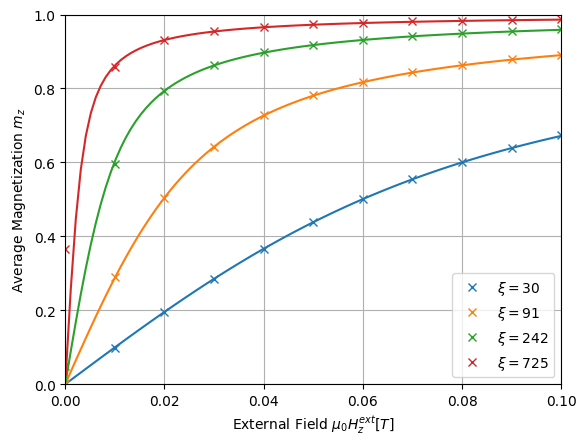

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, xi in enumerate([30, 91, 242, 725]):
    data = np.loadtxt("data/log_xi%d.dat" % xi)
    h = 4*np.pi*1e-7*data[:,1]
    ax.plot(h, data[:,4], 'x', color = cycle[i], label = f"$\\xi = {xi}$")

    h_ref = np.linspace(0.0001, 0.1, num=100)
    ax.plot(h_ref, np.cosh(xi*h_ref)/np.sinh(xi*h_ref)-1/(xi*h_ref), '-', color = cycle[i])


ax.set_xlim([0,0.1])
ax.set_ylim([0,1])
ax.set_xlabel("External Field $\mu_0 H^{ext}_z [T]$")
ax.set_ylabel("Average Magnetization $m_z$")
ax.legend()
ax.grid()
fig.savefig("data/results.png")